#  네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

## Step 1. SentencePiece 설치하기
SentencePiece는 SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다. 아래 링크의 페이지에서 상세한 내용을 파악할 수 있습니다.

google/sentencepiece (https://github.com/google/sentencepiece)
위 페이지의 서두에서도 언급하고 있듯, SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데, 최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있습니다. 앞으로의 실습 과정에서 자주 만나게 될 것이므로 꼭 친숙해지시기를 당부드립니다.

다음과 같이 설치를 진행합니다. SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를 아래와 같이 제공하고 있습니다.



In [1]:
!pip install sentencepiece

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/GD_02_sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


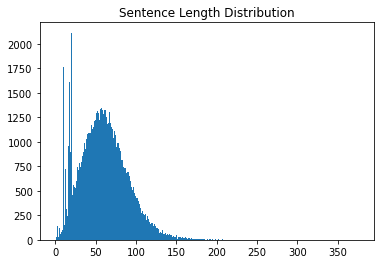

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


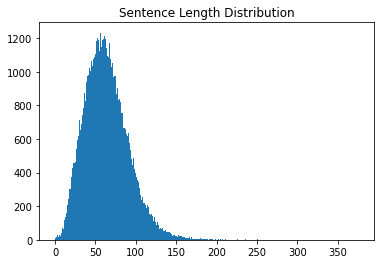

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

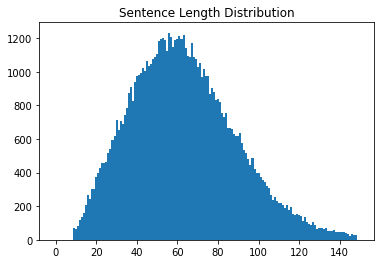

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## Step 2. SentencePiece 모델 학습¶
앞서 배운 tokenize() 함수를 기억하나요? 다시 한번 상기시켜드릴게요!

In [10]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [12]:
import sentencepiece as spm
import os


temp_file = os.getenv('HOME')+'/aiffel/GD_02_sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

# spm.SentencePieceTrainer.Train(
#     '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
# )
# #위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.


# # 왜인지 오류가 나서 학습이 되지 않음 


vocab_size_8k = 8000
vocab_size_16k = 16000




# vocab size=8000, model_type=unigram
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_unigram_8k --vocab_size={}'.format(temp_file, vocab_size_8k)    
)


# vocab size=16000, model_type=unigram
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_uingram_4k --vocab_size={}'.format(temp_file, vocab_size_8k/2)    
)

# vocab size=8000, model_type=bpe
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_bpe_8k --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size_8k)    
)

# vocab size = 16000, model_type=bpe
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_bpe_16k --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size_8k*2)    
)

#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*



-rw-r--r-- 1 root root 376898 Dec 21 07:15 korean_spm.model
-rw-r--r-- 1 root root 146388 Dec 21 07:15 korean_spm.vocab


In [13]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## Step 3. Tokenizer 함수 작성
우리는 위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize() 함수를 정의할 겁니다. 하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게는 정의하기 어렵습니다. 그러니 아래 조건을 만족하는 함수를 정의하도록 하습니다.

1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

2) 생성된 vocab 파일을 읽어와 { : } 형태를 가지는 word_index 사전과 { : } 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.

3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [14]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [15]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 새싹 캠퍼스에 출근해서 일을 했습니다.', '하지만 ㅠㅠ 월급을 받지 못해서 밥을 굶었습니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949  630 7718    4 7979  756   47    7 1657 2677 1024 1795    4  399
     3    0    0    0]
 [ 781    4    0    4   56  640    5 2166 5102   94 5662    5    4 7867
  1983    3    3    3]]



## Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

아마 여러분들은 네이버 영화리뷰 감정 분석 태스크(https://github.com/e9t/nsmc/)를 한 번쯤은 다루어 보았을 것입니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용했을 것입니다.

만약 이 문제에서 tokenizer를 SentencePiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? 비교해 보는 것도 흥미로울 것입니다.

네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
학습된 모델로 sp_tokenize() 메소드 구현하기
구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
(보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기
Word Vector는 활용할 필요가 없습니다. 활용이 가능하지도 않을 것입니다. 머지않아 SentencePiece와 BERT 등의 pretrained 모델을 함께 활용하는 태스크를 다루게 될 것입니다.

### Reference 

1) https://github.com/miinkang/AI_Project_AIFFEL/blob/main/%5BGD-02%5DSentencePiece.ipynb

2) https://piaojian.tistory.com/35

## 1) 데이터 준비와 확인

In [68]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data_org = pd.read_table('~/aiffel/GD_02_sp_tokenizer/data/nsmc/ratings_train.txt')
test_data = pd.read_table('~/aiffel/GD_02_sp_tokenizer/data/nsmc/ratings_test.txt')

train_data.head()

0                              아 더빙.. 진짜 짜증나네요 목소리
1                흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                너무재밓었다그래서보는것을추천한다
3                    교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
5    막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
Name: document, dtype: object

## 2) 데이터로더 구성
실습 때 다루었던 IMDB 데이터셋은 텍스트를 가공하여 imdb.data_loader() 메소드를 호출하면 숫자 인덱스로 변환된 텍스트와 word_to_index 딕셔너리까지 친절하게 제공합니다. 그러나 이번에 다루게 될 nsmc 데이터셋은 전혀 가공되지 않은 텍스트 파일로 이루어져 있습니다. 이것을 읽어서 imdb.data_loader()와 동일하게 동작하는 자신만의 data_loader를 만들어 보는 것으로 시작합니다. data_loader 안에서는 다음을 수행해야 합니다.

데이터의 중복 제거
NaN 결측치 제거
한국어 토크나이저로 토큰화
불용어(Stopwords) 제거
사전word_to_index 구성
텍스트 스트링을 사전 인덱스 스트링으로 변환
X_train, y_train, X_test, y_test, word_to_index 리턴

In [69]:
!pip install --upgrade pip
!pip install --upgrade gensim==3.8.3
!pip install konlpy
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     |████████████████████████████████| 1.7 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3
     |████████████████████████████████| 24.2 MB 4.4 MB/s            
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.13).
git is already the newest version (1:2.17.1-1ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 26 not upgraded.
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [70]:
## LMS Exploration 06 Movie Sentiment Analysis codes


# from konlpy.tag import Mecab
# tokenizer = Mecab()
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# def load_data(train_data, test_data, num_words=10000):
#     train_data.drop_duplicates(subset=['document'], inplace=True)
#     train_data = train_data.dropna(how = 'any') 
#     test_data.drop_duplicates(subset=['document'], inplace=True)
#     test_data = test_data.dropna(how = 'any') 
    
#     X_train = []
#     for sentence in train_data['document']:
#         temp_X = tokenizer.morphs(sentence) # 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#         X_train.append(temp_X)

#     X_test = []
#     for sentence in test_data['document']:
#         temp_X = tokenizer.morphs(sentence) # 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#         X_test.append(temp_X)
    
#     words = np.concatenate(X_train).tolist()
#     counter = Counter(words)
#     counter = counter.most_common(10000-4)
#     vocab = ['', '', '', ''] + [key for key, _ in counter]
#     word_to_index = {word:index for index, word in enumerate(vocab)}
        
#     def wordlist_to_indexlist(wordlist):
#         return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
    
    
#     X_train = list(map(wordlist_to_indexlist, X_train))
#     X_test = list(map(wordlist_to_indexlist, X_test))
        
#     return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
# X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

In [73]:
print("Unique training data : ", train_data_org['document'].nunique())
print("Unique target data : ", train_data_org['label'].nunique())

Unique training data :  146182
Unique target data :  2


In [82]:
# delete the duplicate data
train_data_org.drop_duplicates(subset=['document'], inplace=True)
# use the drop_duplicate method

In [86]:
# check the number of the trainig data again
print('number of total sample : ',len(train_data_org))

number of total sample :  146183


In [88]:
# check the null value in the document (label)
print(train_data_org_.isnull().values.any())

True


In [89]:
# check the location of the null data
train_data_org.loc[train_data_org.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [90]:
# remove the NULL data
train_data_none = train_data_org.dropna(how = 'any')
print(train_data_none.isnull().values.any())



False


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


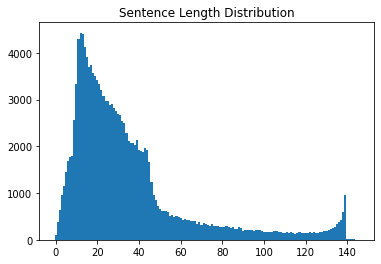

In [122]:
# data preprocessing
document = train_data_none['document']
naver_review = document


min_len = 999
max_len = 0
sum_len = 0

for sen in document:
    length = len(sen)
    if min_len > length: 
        min_len = length
        
    if max_len < length: 
        max_len = length
    
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(document))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in document:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

최장 길이 140에 가까운 데이터가 꽤 많습니다. 어떤 문장인지 확인해봅니다.

In [123]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return 

check_sentence_with_length(document, 135)

후세와 사랑하게된 결정적 계기 그시간이 표현되지 않았으며 시람의 생명을 빼앗아야만하는이유등을 시노가 출현하는 연극으 로 더 알려주었으면 하는 생각이든다. 또한 시노가 얼마나 본능을절제히면서 시랑을 하려고 노력하는지를 더 보여줬다면 좋았을뻔했다
창업을 꿈꾸는가! 좋은 아이템이 있어 사업을 하려하는가!! 그렇다면 기를 쓰고 이 영활 보기바란다!! 그 멀고 험한 여정에 스승이 될것이요 지침서가 될것이다... 혹은 단념에 도움이 될지도... 참 오랜만에 박장대소하며 본 독립영활세~~~ ★
오랜만에 보는 서부극.소재도 독특하고 음악역시 특이하게 가스펠을 편곡해서 썼는데, 색다르네. 배역도 좋았고,개인적으로 제프 브리짓스의 가래낀 목소리싫어하는데,헤일리스테인벨트 보는 맛에 참을 수 있었네. 오랜만에 보는 코엔형제작품, 강추합니다.
내가 영화보면서 처음 눈물 흘리고 본게 스파이더맨3다.나는 어메이징, 스파이더맨 다 좋다. 하지만 내가제일 감명 깊게 본건 스파이더맨 시리즈이면서스파이더맨3다. 할 말이 필요없다. 지금까지도계속 챙겨보고 있다. 이것만 100번은 넘게본거 같다
처음엔 정신이 피폐해진것같아 불쾌했다. 막연히 걱정하지만 넘겨버릴법한 범죄상황을 실감나고 섬세하게 묘사한 감독이 대단하다... 박진감은 넘치지만 억지상황이 난무해 문단속의 중요성을 잊게 한 불사여인의 비현실 영화 '숨바꼭질'이 문득 생각난다.
한동안 댓글 안 썼었는데.. 댓글이 너무해서 씁니다. 1점까진 아닌데 평점이 너무 높아 1점 드리고요.. 한 3,4 점짜리 영화인듯.. 좋은 가족영화라고 해서 개를 훔치는 완벽한 방법 같은 영화로 상상하고 봤는데 정말 뭐라 말이 안나오네요..
보면 볼수록 화가나는 영화;;현실성이 하나도 없음. 진짜 감독의 판타지가 무슨;; 대사도 하나같이 오글거리는거 투성이고...배우들도 연기 하나같이 이상하고..대학입시라는 많은사람들의 꿈과 희망을 이렇게 추악하게 표현하다니 ㅎㅎ 아기분더럽다진심
써머커플 보는 맛에 끝까지 보긴 봤지만 정말 우리나라 막장 아침드라마보다 더 쓰레기같은

In [124]:
check_sentence_with_length(document, 1)

아
잼
1
4
굿
짱
휴
.
음
?
ㅎ
ㅋ
즐
♥
굳
네
ㅇ
k
ㅠ
쒯
♬
토
O
똥
z
헐
삼
꽝
!
풉
ㅅ
왜
ㄴ
쉣
봐
뿌
ㅜ
♡
ㅁ
0
ㅉ
d
흥
乃
찜
귯
린
시
ㅗ
a
c
흠
웅
ㅣ
오
9
쩜
애
헝
쨩
f
움
ㄳ
업
헉
군
b
;
g
올
걍
허
-
쀍
로
ㄹ
ㅂ
갑
즛
킥
함
진
ㅡ
잠
곧
ㅍ
h
·
캬
ㅆ
,
풋
ㄱ
파
ㄷ
웩
꺅
욜
ㅄ
2
핡


In [125]:
check_sentence_with_length(document, 8)

카밀라벨 발연기
내용이 이상해;
너무 좋은 영화
가발 쓰고 싶다
0점은 없나??
말랑말랑 ...
그냥. 최고다.
감동적인 영화다
평점 조절...
재미없음 -_-
전율을 느꼈다.
재미잇음매우~~
좋네..괜찮고.
ㅋㅋㅋ 재미없음
파괴된 관객들.
나수윤의 발견!
너무 배배꼬았다
정말 재미있어요
그래서 2편은?
이건그냥 야동임
나에게는 수면제
같이울게햇으니까
레알 쩐다 ㅇㅇ
별반개도 아깝다
사랑해요 공효진
좋은 로맨스물.
개 쌈마이 영화
재밌다. 그뿐.
빛 좋은 개살구
쵝오의 드라마~
테러방지법...
진정 한심하다.
꼭보소 두번보소
여지없는 푸념.
아 양민수(2)
까브리머싯씀ㅎㅎ
개연성 개나줘.
그냥병맛ㅋㅋㅋㅋ
흠 좀 그렇던데
기대 이하다..
최고의 액션배우
명작...ㅎㅎ;
추억의 명작만화
진리와 평등이제
공포영화 맞니?
개구쟁이 스머프
닥치고 내돈내놔
감독의 내공부족
이거 꾀 재밌다
양요섭 표절논란
별로 같은뎅..
멋지다 조문탁!
인내력 테스트.
이건 뭘 까요?
저평가된 007
어덜트 비디오용
박찬욱편의 승리
화끈한 액션영화
디카프리오, 끝
심형래니까 1점
쫌 아니다...
시간잘때웠습니당
희극 또는 비극
진부한 재난영화
So What?
멸망 ㅈㄹ 한다
하나의 예술작품
완전 재밋습니다
zzzzzzzz
아프네요 가슴이
오자룡은기어갔냐
김리나가 이쁘다
동영상 안 나와
아름다우네요,,
안보여요 ///
이거 너무 좋아
그닥 재미없던데
이것도 영화냐?
한국영화 참아라
흑 부럽다.ㅋㅋ
너무 뻔한 전개
얘네들 뭐냐;;
형식미의 절정.
인상적인 영화.
전설까지야...
휴그랜트만의영화
2도 볼만함..
헛웃음만 나와.
보지마요....
사토시가나오니까
제목 그대로 ~
재밌을것 같아요
스토리가 좋네요
평점 왜케 낮어
영화이해가 안됨
ㅡ.,ㅡ; 뭐얌
재밌겠당..~~
난졸라재밋게봣음
0점은 없는건지
으헝 재미없겠디
충무로의 OOO


### 최적의 max_len을 찾는 함수

In [126]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [127]:
below_threshold_len(36, document)  # 평균
below_threshold_len(140, document)  # 최장 
below_threshold_len(70, document)  # 중앙값
below_threshold_len(50, document)  
below_threshold_len(60, document)  

전체 샘플 중 길이가 36 이하인 샘플의 비율: 66.12920879451643
전체 샘플 중 길이가 140 이하인 샘플의 비율: 99.96237566868697
전체 샘플 중 길이가 70 이하인 샘플의 비율: 88.73869559863732
전체 샘플 중 길이가 50 이하인 샘플의 비율: 82.08808197999754
전체 샘플 중 길이가 60 이하인 샘플의 비율: 85.92850008893024


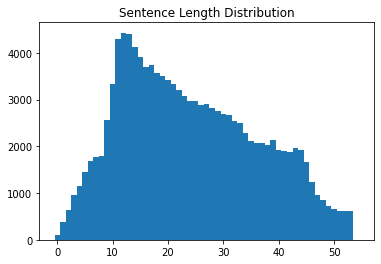

In [132]:
max_len = 55   
min_len = 0

# 길이 조건에 맞는 문장만 선택합니다.

filtered_corpus = [s for s in naver_review if (len(s) < max_len)]


# 데이터프레임 조건부 슬라이싱 
# str.len() 두 함수에 대해 알 수 있었다. 
train_data = naver_review[naver_review.str.len() < max_len]   



sentence_length = np.zeros((max_len), dtype=np.int)

naver_review.head()

for sen in train_data:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

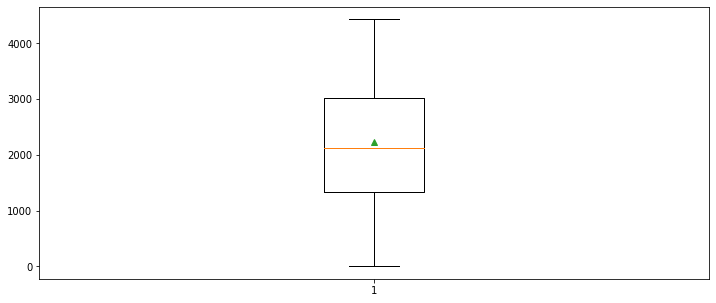

In [133]:
plt.figure(figsize=(12,5))
plt.boxplot([sentence_length], showmeans=True)
plt.show()

## 전처리 하다가 몇개 데이터 날려먹어서 LSTM 모델 돌릴 때 사이즈가 안 맞아서 다시 EDA 처음부터 시작!

In [148]:
train_data = pd.read_table("data/nsmc/"+"ratings_train.txt")
test_data = pd.read_table("data/nsmc/"+"ratings_test.txt")

display(train_data.head())
display(test_data.head())

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [149]:
print("학습데이터 유니크 :",train_data['document'].nunique()) #  약 4,000개의 중복 샘플이 존재
print("타겟데이터 유니크 : ",train_data['label'].nunique())

학습데이터 유니크 : 146182
타겟데이터 유니크 :  2


In [151]:
# 중복데이터 제거
train_data.drop_duplicates(subset=['document'], inplace=True) # drop_duplicates 활용

In [153]:
# 학습데이터 개수 다시 확인
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


In [154]:
# document에 null 값이 있는지 확인
print(train_data.isnull().values.any())

True


In [155]:
# 어느 위치에 누락값이 있는지 확인
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [156]:
# Null값 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [157]:
# 데이터 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
train_data[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [158]:
# 바뀐 데이터 내부에 null값이 있는지 다시 확인
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [159]:
# null 데이터 삭제
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145393


In [160]:
# 테스트데이터에도 동일한 과정 진행
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [161]:
# 데이터 확인
train_data.info()
print("="*50)
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145393 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        145393 non-null  int64 
 1   document  145393 non-null  object
 2   label     145393 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48852 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        48852 non-null  int64 
 1   document  48852 non-null  object
 2   label     48852 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [162]:
# 데이터 확인
display(train_data.head())
display(test_data.head())

print("훈련데이터 : ",len(train_data))
print("테스트데이터 : ",len(test_data))

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


,id,document,label
0,6270596,굳 ㅋ,1
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1


훈련데이터 :  145393
테스트데이터 :  48852


문장의 최단 길이: 1
문장의 최장 길이: 140
문장의 평균 길이: 33
sentence_length :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


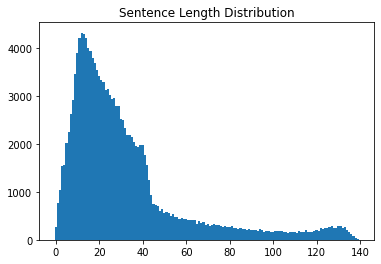

In [163]:
# 데이터 길이 분포 확인하기
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['document']:
    length = len(sen)
    
    # 문장 최소 길이 찾기
    if min_len > length: 
        min_len = length
    
    # 문장 최대 길이 찾기
    if max_len < length: 
        max_len = length
        
    # 전체 문장을 합치면 길이가 얼마나 될까요?
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data))

# 전체 길이만큼 0벡터 ==> 길이에 따른 문장의 수를 저장하기 위해 먼저 0으로 이루어진 리스트를 만든다!!
sentence_length = np.zeros((max_len), dtype=np.int)
print("sentence_length : ",sentence_length)

print("="*60)

# raw는 위에서 다운로드한 데이터셋!! 전체 길이와 상관없음
for sen in train_data['document']:
    sentence_length[len(sen)-1] += 1 # 0으로 이루어진 벡터에 문장 count를 더한 뒤 넣는다.

plt.bar(range(max_len), sentence_length, width=1.0) # 너비는 1.0씩 늘어나도록 설정
plt.title("Sentence Length Distribution")
plt.show()

In [164]:
# 길이 45이하로 한정해 데이터를 만듭니다. ==> 너무 짧은 리뷰는 의미가 없음

# 이렇게 하면 document 내용만 list로 전달됨 ==> 나는 데이터프레임을 원한다!!
train_list = [s for s in train_data['document'] if (len(s) <= 45)]
test_list = [s for s in test_data['document'] if (len(s) <= 45)]

train_list = list(set(train_list))
test_list = list(set(test_list))

train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)

In [165]:
# 길이 40이하인 데이터를 기존 데이터와 병합합니다.

new_train_df = pd.merge(train_data, train_df, how='inner', left_on='document', right_on=0)
new_test_df = pd.merge(test_data, test_df, how='inner', left_on='document', right_on=0)

train_data = new_train_df[['id', 'document', 'label']]
test_data = new_test_df[['id', 'document', 'label']]

In [166]:
display(train_data.head())
display(test_data.head())

print("훈련데이터 : ",len(train_data))
print("테스트데이터 : ",len(test_data))

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0


,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1


훈련데이터 :  118437
테스트데이터 :  39821


## Sentence Piece subwords 점검

In [33]:
!ls -l kor_spm_unigram_8k*
!ls -l kor_spm_unigram_4k*
!ls -l kor_spm_bpe_8k*
!ls -l kor_spm_bpe_16k*

#왜인지 unigram_4k 가 없다.

-rw-r--r-- 1 root root 376906 Dec 21 07:16 kor_spm_unigram_8k.model
-rw-r--r-- 1 root root 146388 Dec 21 07:16 kor_spm_unigram_8k.vocab
ls: cannot access 'kor_spm_unigram_4k*': No such file or directory
-rw-r--r-- 1 root root 371924 Dec 21 07:16 kor_spm_bpe_8k.model
-rw-r--r-- 1 root root 117142 Dec 21 07:16 kor_spm_bpe_8k.vocab
-rw-r--r-- 1 root root 525347 Dec 21 07:17 kor_spm_bpe_16k.model
-rw-r--r-- 1 root root 260561 Dec 21 07:17 kor_spm_bpe_16k.vocab


In [41]:
import csv

vocab_list_uni_8k = pd.read_csv('kor_spm_unigram_8k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list_uni_8k[:10]

,0,1
0,<unk>,0.00000
1,<s>,0.00000
2,</s>,0.00000
3,.,-3.40925
4,▁,-3.43895
5,을,-3.85174
6,의,-3.93619
7,에,-4.21533
8,이,-4.30459
9,를,-4.32250


In [44]:
print('subword의 개수 :', len(vocab_list_uni_8k))
vocab_list_uni_8k.sample(10)

subword의 개수 : 8000


,0,1
706,▁개발,-8.45646
2999,▁때문,-9.83338
6182,▁윔블던,-10.77990
79,명이,-6.78468
7480,▁모로코,-11.27710
6857,▁국민투표,-10.98540
7920,뀌,-15.22950
5673,▁홍수로,-10.61980
3283,버그,-9.91541
7675,섯,-11.91960


In [43]:
vocab_list_bpe_8k = pd.read_csv('kor_spm_bpe_8k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list_bpe_8k[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁이,0
4,했다,-1
5,▁있,-2
6,에서,-3
7,▁대,-4
8,▁사,-5
9,▁지,-6


In [45]:
print('subword의 개수 :', len(vocab_list_bpe_8k))
vocab_list_bpe_8k.sample(10)

subword의 개수 : 8000


,0,1
4544,기업,-4541
4818,음에도,-4815
7610,짧,-7607
6096,▁폭파,-6093
3508,://,-3505
1289,▁않는다,-1286
243,er,-240
469,▁레,-466
7009,락,-7006
4418,▁네덜란드,-4415


In [46]:
vocab_list_bpe_16k = pd.read_csv('kor_spm_bpe_16k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list_bpe_16k[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁이,0
4,했다,-1
5,▁있,-2
6,에서,-3
7,▁대,-4
8,▁사,-5
9,▁지,-6


In [47]:
print('subword의 개수 :', len(vocab_list_bpe_16k))
vocab_list_bpe_16k.sample(10)

subword의 개수 : 16000


,0,1
9736,ele,-9733
1512,▁높은,-1509
7201,▁연금,-7198
13248,▁팔루,-13245
4716,년간의,-4713
3701,▁케네,-3698
2585,▁보고서는,-2582
12572,▁YORK,-12569
9884,▁연구에서,-9881
10882,▁판단을,-10879


## SentencePiece 성능 비교평가
 - vocab size = 8k, 16k
 - model type = unigram, bpe
 - kor_spm_unigram_8k
 - kor_spm_unigram_16k
 - kor_spm_bpe_8k
 - kor_spm_bpe_16k

In [48]:
def test_performance(model):
    s = spm.SentencePieceProcessor()
    s.Load(model)

    # SentencePiece를 활용한 sentence -> encoding
    tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
    print(tokensIDs)

    # SentencePiece를 활용한 sentence -> encoded pieces
    print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

    # SentencePiece를 활용한 encoding -> sentence 복원
    print(s.DecodeIds(tokensIDs))

In [49]:
print('kor_spm_unigram_8k')
test_performance(model='kor_spm_unigram_8k.model')

# # unigram은 오류가 나서 학습이 되지 않았다. 
# print('kor_spm_unigram_4k')
# test_performance(model='kor_spm_unigram_4k.model')

print('kor_spm_bpe_8k')
test_performance(model='kor_spm_bpe_8k.model')

print('kor_spm_bpe_16k')
test_performance(model='kor_spm_bpe_16k.model')

kor_spm_unigram_8k
[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.
kor_spm_bpe_8k
[1520, 1154, 6614, 6710, 2644, 6782, 6685, 6687]
['▁아버', '지가', '방에', '들', '어가', '신', '다', '.']
아버지가방에들어가신다.
kor_spm_bpe_16k
[7651, 6614, 14710, 2644, 14782, 14685, 14687]
['▁아버지가', '방에', '들', '어가', '신', '다', '.']
아버지가방에들어가신다.


## 3. SPM을 받을 수 있는 Tokenizer 함수 작성
#### 훈련시킨 SentencePiece를 활용해 tokenizer역할을 하는 함수를 정의합니다.

함수의 조건
1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.


2) 생성된 vocab 파일을 읽어와 { \ : \ } 형태를 가지는 word_index 사전과 { \ : \} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.


3) 리턴값인 tensor는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [50]:
def sp_tokenize(s, corpus, spm):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./{}.vocab".format(spm), 'r') as f: 
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen=max_len)

    return tensor, word_index, index_word

In [56]:
# sp_tokenize(s, corpus) 사용 예제

s = spm.SentencePieceProcessor()
# s.Load('kor_spm_bpe_16k.model')  # lstm 학습시 오류

s.Load('kor_spm_unigram_8k.model') 

my_corpus = ['나는 새싹 캠퍼스에 출근해서 일을 했습니다.', '하지만 ㅠㅠ 월급을 받지 못해서 밥을 굶었습니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus, 'kor_spm_unigram_8k')           
print(tensor)
# print(word_index)
# print(index_word)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 1949  630 7718    4 7979  756   47
     7 1657 2677 1024 1795    4  399    3]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  781    4    0    4   56  640    5 2166 5102   94
  5662    5    4 7867 1983    3    3    3]]


In [173]:
model_uni_8k='kor_spm_unigram_8k'
model_uni_4k='kor_spm_unigram_4k'
model_bpe_8k='kor_spm_bpe_8k'
model_bpe_16k='kor_spm_bpe_16k'

## 훈련데이터 / 테스트 데이터 나누기

In [198]:
# document와 label을 나눠봅시다.

x_train,x_train_word_index,x_train_index_word = sp_tokenize(s, train_data['document'], model_uni_8k)
x_test,x_test_word_index, x_test_index_word = sp_tokenize(s, test_data['document'], model_uni_8k)

In [199]:
# 현재 list 상태 ==> ndarray로 바꿔주기
y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

In [200]:
print(x_train[:3])
print(x_test[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  142  106 2615  909 4849    4 4849  757   69  555  520 2648]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  

In [177]:
print(y_train[:3])
print(y_test[:3])

[0 1 0]
[1 0 0]


In [201]:
print("학습데이터 :",len(x_train))
print("타겟데이터 :",len(y_train))

학습데이터 : 118437
타겟데이터 : 118437


In [179]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [180]:
print(train_input[:3])
print(val_input[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 2009   24  812    7 1001 2295  379  113
   199  265   10 2760    8   14  218 1526    6 3582  128  222  620  521]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  

## 4. lstm으로 감정분석 모델 학습
SentencePiece 토크나이저가 적용된 모델을 학습 후 수렴하는 것을 확인합니다.


SentencePiece 토크나이저 성능 평가

In [61]:
tensor, word_index, index_word = sp_tokenize(s, naver_review, 'kor_spm_unigram_8k')

In [185]:
from tensorflow.keras.initializers import Constant

vocab_size = vocab_size
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim,
                                    ))
            
model_LSTM.add(keras.layers.LSTM(128))
# model_LSTM.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          256000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 338,561
Trainable params: 338,561
Non-trainable params: 0
_________________________________________________________________


#### Earlystopping & Model Checkpoint

In [195]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [196]:
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size=64

history_LSTM = model_LSTM.fit(train_input,
                              train_target,
                              epochs=20,
                              batch_size=batch_size,
                              validation_data=(val_input, val_target),
                              callbacks=[es, mc],
                              verbose=1
                             )

Epoch 1/20
1481/1481 [==============================] - 47s 31ms/step - loss: 0.3122 - accuracy: 0.8636 - val_loss: 0.3889 - val_accuracy: 0.8271
Epoch 2/20
1481/1481 [==============================] - 45s 30ms/step - loss: 0.2881 - accuracy: 0.8771 - val_loss: 0.3847 - val_accuracy: 0.8275
Epoch 3/20
1481/1481 [==============================] - 45s 30ms/step - loss: 0.2667 - accuracy: 0.8899 - val_loss: 0.3970 - val_accuracy: 0.8224
Epoch 4/20
1481/1481 [==============================] - 45s 30ms/step - loss: 0.2493 - accuracy: 0.8969 - val_loss: 0.4151 - val_accuracy: 0.8232
Epoch 5/20
1481/1481 [==============================] - 46s 31ms/step - loss: 0.2334 - accuracy: 0.9057 - val_loss: 0.4281 - val_accuracy: 0.8230
Epoch 6/20
1481/1481 [==============================] - 45s 31ms/step - loss: 0.2155 - accuracy: 0.9138 - val_loss: 0.4784 - val_accuracy: 0.8189
Epoch 00006: early stopping


In [202]:
results = model_LSTM.evaluate(x_test,  y_test, verbose=2)
print(results)

1245/1245 - 10s - loss: 0.4736 - accuracy: 0.8194
[0.47356146574020386, 0.8193917870521545]


In [203]:
def visualize_train(train_history, param):
    # summarize history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('{}_accuracy'.format(param))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('{}_loss'.format(param))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

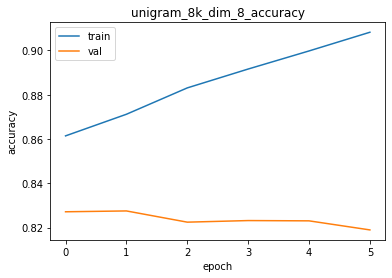

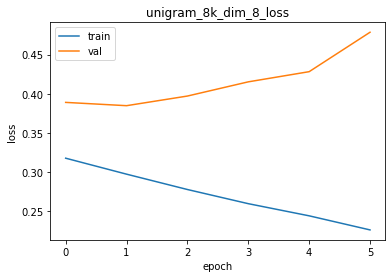

In [206]:
visualize_train(history_LSTM, param='unigram_8k_dim_8')

## 5. 모델 성능 비교 평가

비교 대상
 - LSTM의 input x_data를 토크나이징한 SentencePiece 모델
 - LSTM모델의 Word_vector_dimension

In [213]:
def performance_test_spm(spm_model, vocab_size, word_vector_dim):
    s = spm.SentencePieceProcessor()
    s.Load("{}.model".format(spm_model)) 
    
    # document와 label을 나눠봅시다.
    x_train,x_train_word_index,x_train_index_word = sp_tokenize(s, train_data['document'], model_uni_8k)
    x_test,x_test_word_index, x_test_index_word = sp_tokenize(s, test_data['document'], model_uni_8k)

    # 현재 list 상태 ==> ndarray로 바꿔주기
    y_train = np.array(list(train_data['label']))
    y_test = np.array(list(test_data['label']))


    train_input, val_input, train_target, val_target = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


    model_LSTM = keras.Sequential()
    model_LSTM.add(keras.layers.Embedding(vocab_size, 
                                     word_vector_dim,
                                        ))

    model_LSTM.add(keras.layers.LSTM(128))
    model_LSTM.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

    model_LSTM.summary()
    
    model_LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
    epochs=10
    batch_size=64
    
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    
    
    history_LSTM = model_LSTM.fit(train_input,
                              train_target,
                              epochs=20,
                              batch_size=batch_size,
                              validation_data=(val_input, val_target),
                              callbacks=[es, mc],
                              verbose=1
                             )
    
    results = model_LSTM.evaluate(x_test,  y_test, verbose=2)
    print(results)
    
    return history_LSTM


## 모델에서 변수들의 이름이 섞여서 (train_target 과 x_train 등) 애를 많이 먹었다. 결국 이를 고쳐준 나의 승리!

In [212]:
history_unigram_8k_dim_8 = performance_test_spm('kor_spm_unigram_8k', vocab_size, word_vector_dim=8)
history_unigram_8k_dim_64 = performance_test_spm('kor_spm_unigram_8k', vocab_size, word_vector_dim=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 134,273
Trainable params: 134,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1481/1481 [==============================] - 47s 31ms/step - loss: 0.5265 - accuracy: 0.7294 - val_loss: 0.4251 - val_accuracy: 0.8067
Epoch 2/20
1481/1481 [==============================] - 44s 30ms/step - loss: 0.4247 - accuracy: 0.8108 - val_loss: 0.4166 - val_accuracy: 0.8103
Epoch 3/20
1481/1481 [==============================] - 43s 29ms/step - loss: 0.3836 -

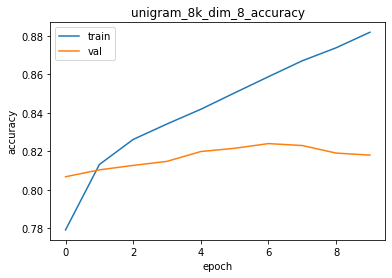

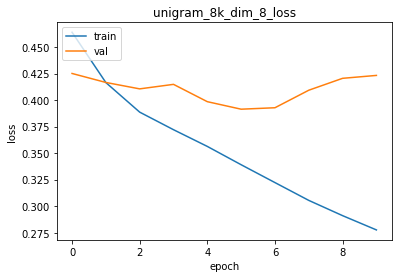

In [216]:
visualize_train(history_unigram_8k_dim_8, param='unigram_8k_dim_8')

In [221]:
# 학습을 시킬 때 에러가 났다.

# history_bpe_16k_dim_32 = performance_test_spm('kor_spm_bpe_16k', vocab_size, word_vector_dim=32)


# 아래는 에러코드입니다.
# InvalidArgumentError: 2 root error(s) found.
#   (0) Invalid argument:  indices[60,129] = 15311 is not in [0, 8000)
# 	 [[node sequential_7/embedding_7/embedding_lookup (defined at <ipython-input-213-39b87160ea35>:44) ]]
# 	 [[sequential_7/embedding_7/embedding_lookup/_20]]
#   (1) Invalid argument:  indices[60,129] = 15311 is not in [0, 8000)
# 	 [[node sequential_7/embedding_7/embedding_lookup (defined at <ipython-input-213-39b87160ea35>:44) ]]
# 0 successful operations.
# 0 derived errors ignored. [Op:__inference_train_function_226789]

# Errors may have originated from an input operation.
# Input Source operations connected to node sequential_7/embedding_7/embedding_lookup:
#  sequential_7/embedding_7/embedding_lookup/225557 (defined at /opt/conda/lib/python3.7/contextlib.py:112)

# Input Source operations connected to node sequential_7/embedding_7/embedding_lookup:
#  sequential_7/embedding_7/embedding_lookup/225557 (defined at /opt/conda/lib/python3.7/contextlib.py:112)

# Function call stack:
# train_function -> train_function



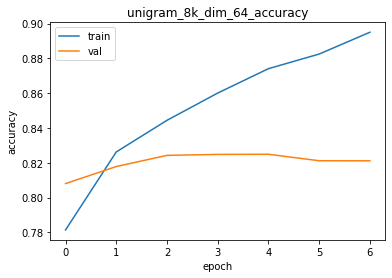

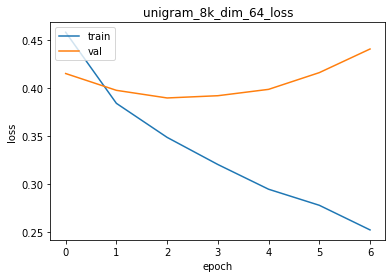

In [218]:
visualize_train(history_unigram_8k_dim_64, param='unigram_8k_dim_64')

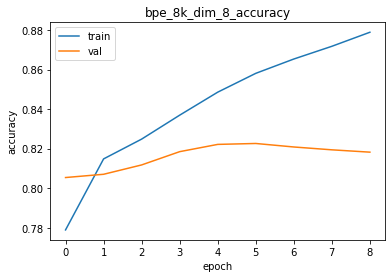

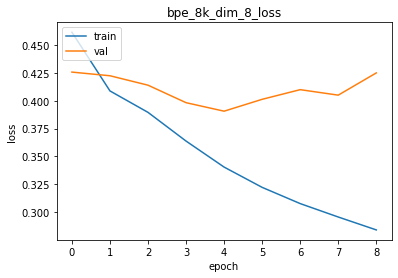

In [219]:
visualize_train(history_bpe_8k_dim_8, param='bpe_8k_dim_8')

In [220]:
# 왠지 모르지만 16k는 학습할 때 에러가 났다.

# visualize_train(history_bpe_16k_dim_64, param='bpe_8k_dim_64')

NameError: name 'history_bpe_16k_dim_64' is not defined

## 회고 및 결론


original unigram_8k

 - 1245/1245 - 10s - loss: 0.4736 - accuracy: 0.8194

 - [0.47356146574020386, 0.8193917870521545]

#### Best result
uningram_8k, vocab = 8

 - 1245/1245 - 10s - loss: 0.4242 - accuracy: 0.8188
 - [0.42419102787971497, 0.8188393115997314]

unigram_8k, vocab = 64

 - 1245/1245 - 10s - loss: 0.4325 - accuracy: 0.8247
 - [0.43249306082725525, 0.8247156143188477]
 
 
uningram_8k, vocab = 8의 모델이 가장 학습이 잘 되었다.

위에서 공유한 두 개의 링크
 - https://piaojian.tistory.com/35, 
 - https://github.com/miinkang/AI_Project_AIFFEL/blob/main/%5BGD-02%5DSentencePiece.ipynb)
 
 를 참고하면서 코드를 작성해봤다. 첫 번재의 링크는 모델을 간결하게 쓰고, callbacks, modelcheckpoint등을 사용해서 좋았고, 두 분째의 링크는 모델의 종류(unigram, bpe)와 workd_vector dimension을 여러가지로 바꾸어 보는 시도와 여러가지 전처리등을 활용했기에 둘 다 합치면 더 좋은 결과가 나올거라고 생각했다. 하지만... 나의 한계인지 bpe모델들은 무언가가 계속 에러가 났다.
 
다음 기회에는 이 sentence piece를 활용해서 챗봇에 적용해보고 싶다. 

흥미로웠던 점은 word_vector의 차원이 올라간다고 해서 무조건 모델의 정확도가 올라가는 것은 아니라는 것이다.

또한, 전처리 과정에서 너무 길거나 짧은 글자들을 제거해준다는 점 (EXP07에서도 활용)을 보았을시에 전처리를 어떻게 하는가, 그리고 어떠한 토크나이저를 사용하는가가 중요한 것을 알 수 있었다.